In [1]:
Pkg.add("symbolics")
Pkg.add("dataframe")

UndefVarError: UndefVarError: `pkg` not defined

In [3]:
function bisection(f::Function, a, b)
    fa = f(a)
    fb = f(b)

    if fa * fb  > 0 
        error("f(a) y f(b) tienen el mismo signo")
    end

    c = (a+b) / 2
    fc = f(c)
    E = abs(fc - 0)
    
    while E > 0.02 
        if fa*fc < 0
            b = c
        else
            a = c
        end
        c = (a+b) / 2
        fc = f(c)
        E = abs(fc - 0)
    end 

    return c
end

bisection (generic function with 1 method)

In [ ]:
function NewtonRaphson(f::Function, x0)
    x = Symbol('x')
    dif = diff(f(x))

    c = x0 - (f(x0)/dif(x0))
    fc = f(c)
    E = abs(fc - 0)

    while E >= 10^-5
        c = c - (f(c)/dif(c))
        fc = f(c)
        E = abs(fc - 0) 
    end

    return c
end 


NewtonRaphson (generic function with 1 method)

In [1]:
function SecantMethod(f::Function,p0,p1)

    p2 = p1 - ((f(p1)*f(p1-p0)) / (f(p1)- f(p0)))
    E = abs(f(p2) - 0)

    while E >= 10^-5
        p0 = p1
        p1 = p2
        
        p2 = p1 - ((f(p1)*f(p1-p0)) / (f(p1)- f(p0)))
        E = abs(f(p2) - 0)
    end

    return p2
    
end

SecantMethod (generic function with 1 method)

In [2]:
function f(x)
    return x^3 + 2*x^2 + 10*x - 20
end

f (generic function with 1 method)

In [6]:
SecantMethod(f, 1, 2)

-Inf

In [25]:
 function Lagrange(x::Float64, valores::Array)
    result = 0   

    for i = 1:length(valores)
        numerador = 1
        denominador = 1
        for j = 1:length(valores) 
            if j != i
                numerador *= (x - valores[j][1])
                denominador *= (valores[i][1]-valores[j][1])  
            end
        end
        result += valores[i][2] * (numerador/denominador)
    end

    return result
end


values = [[1,0],[4,1.386294],[6,1.791759]]
x = 2
Lagrange(x,values)

0.5658441999999999

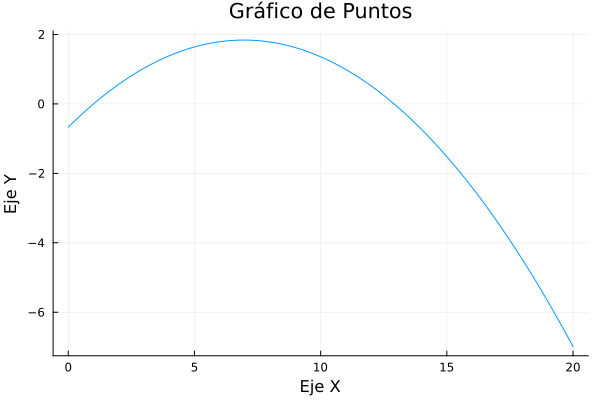

In [34]:
using Plots

values = [[1,0],[4,1.386294],[6,1.791759]]
points = [[x, Lagrange(x,values)] for x = 0:0.2:20]

x = [p[1] for p in points]
y = [p[2] for p in points]

# Graficar puntos utilizando scatter()
plot(x, y, legend=false, title="Gráfico de Puntos", xlabel="Eje X", ylabel="Eje Y")
# plot(x, exp, legend=false, title="Gráfico de Puntos", xlabel="Eje X", ylabel="Eje Y")